Memuat MNIST Dataset:

In [22]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Visualisasikan Beberapa Data MNIST:

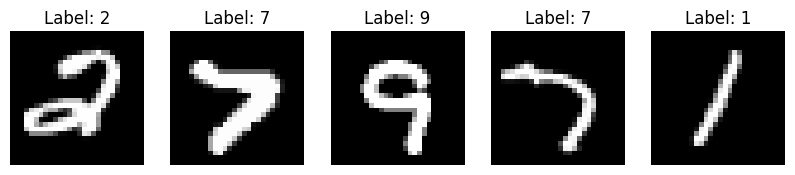

In [23]:
import matplotlib.pyplot as plt
import random

# Fungsi untuk menampilkan beberapa sampel
def show_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
    for i in range(num_samples):
        index = random.randint(0, len(dataset))
        image, label = dataset[index]
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

show_samples(train_dataset, num_samples=5)

Rancang Model Neural Network:

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

Siapkan Hyperparameter:

In [25]:
import torch
import torch.optim as optim

# Definisikan loss function (contoh: CrossEntropyLoss)
criterion = torch.nn.CrossEntropyLoss()

# Definisikan learning rate (contoh: 0.001)
learning_rate = 0.001

# Definisikan optimizer (misalnya: SGD) dan gunakan learning rate
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

Train Data Loader

In [36]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

# Transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

from torch.utils.data import DataLoader

BATCH_SIZE = 64  # Ganti dengan ukuran batch yang sesuai
num_epochs = 10

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

Training Loop:

In [39]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
      test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
      inputs, labels = data
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}')


Epoch 1, Loss: 2.20866261565609
Epoch 2, Loss: 1.9045193380892658
Epoch 3, Loss: 1.4104612746091285
Epoch 4, Loss: 0.9750111548504087
Epoch 5, Loss: 0.7338092250546921
Epoch 6, Loss: 0.6096536717943545
Epoch 7, Loss: 0.5375573520085959
Epoch 8, Loss: 0.49061343396332724
Epoch 9, Loss: 0.45756856101090465
Epoch 10, Loss: 0.43269311152160295


Evaluasi Model:

In [42]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Inisialisasi y_true dan y_pred
y_true = []
y_pred = []

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')

# Precision
precision = precision_score(y_true, y_pred, average='weighted')

# Recall
recall = recall_score(y_true, y_pred, average='weighted')

# Classification Report
class_report = classification_report(y_true, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

accuracy = correct / total

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:\n", class_report)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

F1 Score: 0.8862453950828725
Precision: 0.8865462743333435
Recall: 0.8866
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.96      0.95      1135
           2       0.89      0.85      0.87      1032
           3       0.89      0.86      0.87      1010
           4       0.85      0.91      0.88       982
           5       0.82      0.81      0.82       892
           6       0.90      0.92      0.91       958
           7       0.92      0.88      0.90      1028
           8       0.86      0.83      0.84       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8866
Confusion Matrix:
[[ 949    0    5    1    0   15    8    1    1    0]
 [   0 1092    0    5    1    3    4    1   29    0]
 [

Deskripsi Hasil:

A. F1 Score:

Nilai F1 Score yang tinggi (mendekati 1) menunjukkan kinerja model yang baik. Nilai F1 Score yang telah peroleh adalah 0.8862, yang menunjukkan kinerja yang baik.

B. Precision:

Precision tinggi menunjukkan sedikitnya false positive. Precision tertinggi ditemukan pada kelas 0 (0.93) dan 1 (0.94).

C. Recall:

Recall tinggi menunjukkan sedikitnya false negative. Recall tertinggi ditemukan pada kelas 0 (0.97) dan 1 (0.96).

D. Classification Report:

Dapat dilihat bahwa kinerja model cukup baik pada sebagian besar kelas dengan nilai F1 Score dan recall yang baik.

E. Accuracy:

Akurasi yang tinggi (0.8866) menunjukkan bahwa model melakukan prediksi yang benar pada sebagian besar data pengujian.

F. Confusion Matrix:

Dapat dilihat bahwa sebagian besar elemen di diagonal utama adalah angka yang tinggi, yang mengindikasikan prediksi yang benar, sementara elemen di luar diagonal utama mengindikasikan kesalahan prediksi.

G. Kesimpulan

kesimpulan yang dapat diambil dari output akhir secara keseluruhan yang ada program adalah, bahwa model yang dirancang memiliki performa yang cukup baik dalam mengklasifikasikan gambar-gambar digit dari dataset MNIST, dengan F1 Score, presisi, dan recall yang tinggi untuk sebagian besar kelas.